# Assignment 1: Pranoramic Image Stitching

## Part 1: 2D Convolution

In [1]:
import cv2 
import numpy as np
from PIL import Image, ImageOps
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def plot_image(img: np.array):
    plt.figure(figsize=(6, 6))
    plt.imshow(img, cmap='gray');
    
def plot_two_images(img1: np.array, img2: np.array):
    _, ax = plt.subplots(1, 2, figsize=(12, 6))
    ax[0].imshow(img1, cmap='gray')
    ax[1].imshow(img2, cmap='gray');
    

In [3]:
def conv2d(img: np.array, kernel: np.array) -> np.array:
    """
    Take a 2D image and a given kernel, perform convolution operation.
    
    Parameters
    ----------
        `img`    (`np.array`): input image
        `kernel` (`np.array`): convolution kernel
    
    Returns
    -------
        `np.array`: the output image
    """

    # Calculate the output image shape (assuming 0 padding, stride 1)
    w_k = kernel.shape[0]
    h_k = kernel.shape[1]
    w_out = np.floor((img.shape[0] - w_k)).astype(int) + 1
    h_out = np.floor((img.shape[1] - h_k)).astype(int) + 1
    # Create a output image filled by zeros
    img_out = np.zeros(shape=(w_out, h_out))
    
    # Perform convolution
    for i in range(w_out):
        for j in range(h_out):
            mat = img[i:i+w_k, j:j+h_k]
            img_out[i, j] = np.sum(np.multiply(mat, kernel))
            
    return img_out


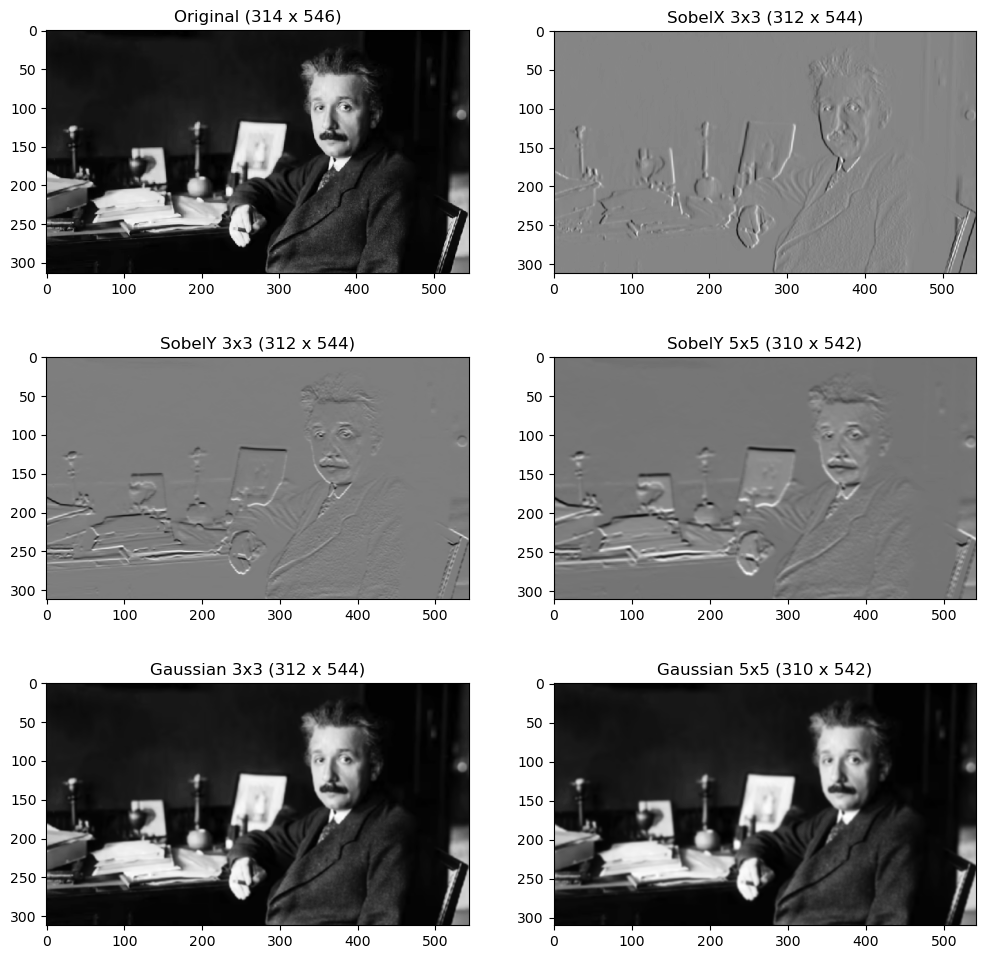

In [4]:
# Read the input image as a grayscale image
img = Image.open('images/einstein.png')
img = ImageOps.grayscale(img)

# Define some kernels
sobel_x_3_3 = np.array([
    [ 1,  0, -1],
    [ 2,  0, -2],
    [ 1,  0, -1]
])
sobel_y_3_3 = np.array([
    [ 1,  2,  1],
    [ 0,  0,  0],
    [-1, -2, -1]
])
sobel_y_5_5 = np.array([
    [ 2,  2,  4,  2,  2],
    [ 1,  1,  2,  1,  1],
    [ 0,  0,  1,  2,  0],
    [-1, -1, -2, -1, -1],
    [-2, -2, -4, -2, -2]
])
gaussian_3_3 = np.array([
    [1, 2, 1],
    [2, 4, 2],
    [1, 2, 1]
])
gaussian_5_5 = np.array([
    [ 1,  4,  7,  4,  1],
    [ 4, 16, 26, 16,  4],
    [ 7, 26, 41, 26,  7],
    [ 4, 16, 26, 16,  4],
    [ 1,  4,  7,  4,  1]
])

# Apply kernels to the input image
# plt.figure(figsize=(4, 4))
# plt.imshow(img, cmap='gray');
# plt.title('Original (%d x %d)' %(np.array(img).shape[0], np.array(img).shape[1]), fontsize=10)
# _, ax = plt.subplots(2, 2, figsize=(12, 8))

# Original image
_, ax = plt.subplots(3, 2, figsize=(12, 12))
ax[0][0].imshow(np.array(img), cmap='gray')
ax[0][0].title.set_text('Original (%d x %d)' %(np.array(img).shape[0], np.array(img).shape[1]))

# Sobel
img_sobel_x_3 = conv2d(img=np.array(img), kernel=sobel_x_3_3)
ax[0][1].imshow(img_sobel_x_3, cmap='gray')
ax[0][1].title.set_text('SobelX 3x3 (%d x %d)' %(img_sobel_x_3.shape[0], img_sobel_x_3.shape[1]))
img_sobel_y_3 = conv2d(img=np.array(img), kernel=sobel_y_3_3)
ax[1][0].imshow(img_sobel_y_3, cmap='gray')
ax[1][0].title.set_text('SobelY 3x3 (%d x %d)' %(img_sobel_y_3.shape[0], img_sobel_y_3.shape[1]))
img_sobel_y_5 = conv2d(img=np.array(img), kernel=sobel_y_5_5)
ax[1][1].imshow(img_sobel_y_5, cmap='gray')
ax[1][1].title.set_text('SobelY 5x5 (%d x %d)' %(img_sobel_y_5.shape[0], img_sobel_y_5.shape[1]))

# Gaussian
img_gauss_3 = conv2d(img=np.array(img), kernel=gaussian_3_3)
ax[2][0].imshow(img_gauss_3, cmap='gray')
ax[2][0].title.set_text('Gaussian 3x3 (%d x %d)' %(img_gauss_3.shape[0], img_gauss_3.shape[1]))
img_gauss_5 = conv2d(img=np.array(img), kernel=gaussian_5_5)
ax[2][1].imshow(img_gauss_5, cmap='gray')
ax[2][1].title.set_text('Gaussian 5x5 (%d x %d)' %(img_gauss_5.shape[0], img_gauss_5.shape[1]))

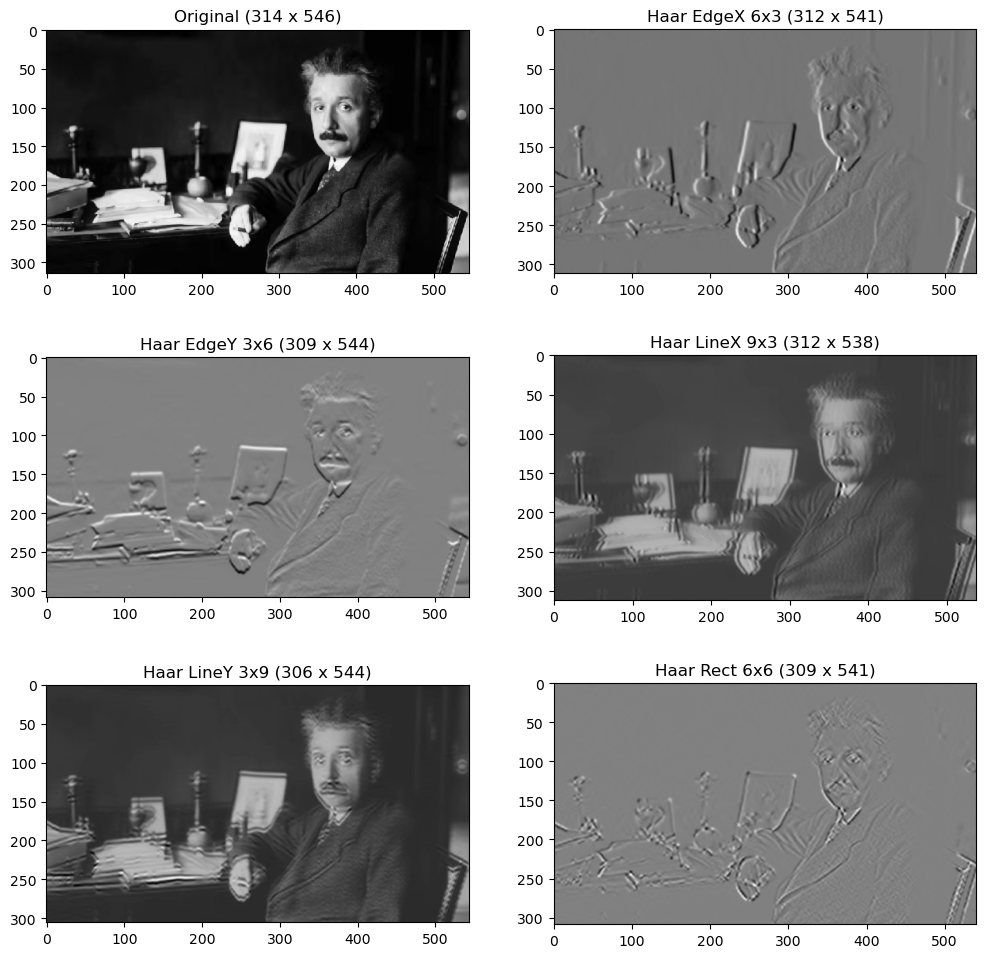

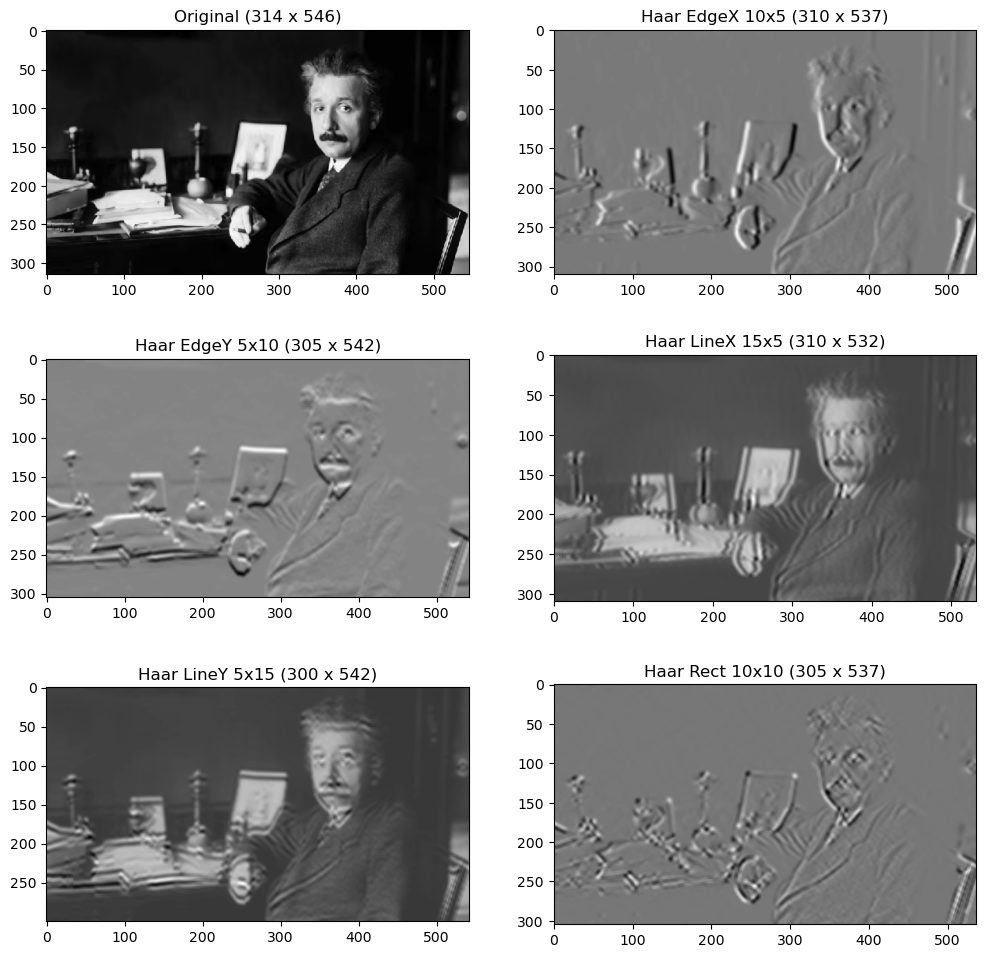

In [5]:
def haar_kernel(style: int = 2, axis: int = 0, scale: int = 1) -> np.array:
    """
    Take a 2D image and a given kernel, perform convolution operation.
    
    Parameters
    ----------
        `style` (`int`): type of kernel, 0 for edge, 1 for line', and 2 for four-rect feature
        `axis`  (`int`): for kernel type 0 and 1, this is the axis of the target feature
        `scale` (`int`): scale of the kernel
    
    Raises
    ------
        `RuntimeWarning`: If there is no corresponding cell, the map file might contain illegal characters.
    
    Returns
    -------
        `np.array`: the output haar-like kernel
    """

    if scale < 1:
        raise RuntimeWarning('Invalid scale input. Please use an int larger than 0.')
    
    # When using edge feature kernel
    if style == 0:
        kernel = np.ones((2*scale, 1*scale), dtype=int)
        kernel[0:scale, :] = -1
    # When using line feature kernel
    elif style == 1:
        kernel = np.ones((3*scale, 1*scale), dtype=int)
        kernel[1*scale:2*scale, :] = -1
    # When using four rectangle feature kernel
    else:
        kernel = np.ones((2*scale, 2*scale), dtype=int)
        kernel[0:scale, 0:scale] = -1
        kernel[scale:, scale:] = -1
        
    # Transpose if the desired feature axis is 1
    if axis == 0:
        return kernel.transpose()
    else:
        return kernel

def plot_haar_results(img: np.array, scale: int = 1) -> None:
    """
    Plot the results of applying Haar-like kernels to the original image.
    
    Parameters
    ----------
        `img` (`np.array`): input image
        `scale` (`int`): scale of the kernels
    
    Returns
    -------
        `none`: 
    """
    
    # Original image
    _, ax = plt.subplots(3, 2, figsize=(12, 12))
    ax[0][0].imshow(np.array(img), cmap='gray')
    ax[0][0].title.set_text('Original (%d x %d)' %(np.array(img).shape[0], np.array(img).shape[1]))

    # Edge Feature
    img_haar_1 = conv2d(img=np.array(img), kernel=haar_kernel(style=0, axis=0, scale=scale))
    ax[0][1].imshow(img_haar_1, cmap='gray')
    ax[0][1].title.set_text('Haar EdgeX %dx%d (%d x %d)' %(2*scale, 1*scale, img_haar_1.shape[0], img_haar_1.shape[1]))
    img_haar_2 = conv2d(img=np.array(img), kernel=haar_kernel(style=0, axis=1, scale=scale))
    ax[1][0].imshow(img_haar_2, cmap='gray')
    ax[1][0].title.set_text('Haar EdgeY %dx%d (%d x %d)' %(1*scale, 2*scale, img_haar_2.shape[0], img_haar_2.shape[1]))
    # Line Feature
    img_haar_3 = conv2d(img=np.array(img), kernel=haar_kernel(style=1, axis=0, scale=scale))
    ax[1][1].imshow(img_haar_3, cmap='gray')
    ax[1][1].title.set_text('Haar LineX %dx%d (%d x %d)' %(3*scale, 1*scale, img_haar_3.shape[0], img_haar_3.shape[1]))
    img_haar_4 = conv2d(img=np.array(img), kernel=haar_kernel(style=1, axis=1, scale=scale))
    ax[2][0].imshow(img_haar_4, cmap='gray')
    ax[2][0].title.set_text('Haar LineY %dx%d (%d x %d)' %(1*scale, 3*scale, img_haar_4.shape[0], img_haar_4.shape[1]))
    # Four-rectangle Feature
    img_haar_5 = conv2d(img=np.array(img), kernel=haar_kernel(style=2, axis=0, scale=scale))
    ax[2][1].imshow(img_haar_5, cmap='gray')
    ax[2][1].title.set_text('Haar Rect %dx%d (%d x %d)' %(2*scale, 2*scale, img_haar_5.shape[0], img_haar_5.shape[1]))
    
    return

# Plot results of different scales
plot_haar_results(img, scale=3)
plot_haar_results(img, scale=5)

### Part 1 Conclusion

#### 1. Sobel Kernels
After applying the two Sobel kernels (one designed for feature along the x-axis and one for features along the y-axis) to the image, the edge features become more visible and stand out from the rest of the iamge. It can be observed that by applying the Sobel X kernel, the gradient changes in the x-direction are extracted from the image. The same effect can be observed from the Sobel Y kernel. When changing the size of the kernel, output images show that a larger kernel size can produce more significant edge features. Since a larger kernel is able to cover a larger region on the image, after the convolution operation, more pixels surrounding the features in the output image will be highlighted. 

#### 2. Gaussian Kernels
Generally, Gaussian kernels apply a bluring effect to the images. The larger the size of the kernel is, the stronger the bluring effect will be, as the convolution operation involves a larger local region of the image. 

#### 3. Haar-like Kernels
After applying two different Type-1 Haar-like kernel, the edge features in the x/y directions are extracted from the image, and by using the two different Type-2 Haar-like kernel, the line features in the x/y directions are extracted. While the Type-3 Haar-like kernel are more sensitive to features in the diagonal direction. The size of the kernel shows a significant influence on the output image. The larger the size is, the stronger feature extraction capablity the kernel has. 


## Part 2: SIFT Features and Descriptors

[ WARN:0@54.059] global /opt/conda/conda-bld/opencv-suite_1664548337286/work/opencv_contrib-4.6.0/modules/xfeatures2d/misc/python/shadow_sift.hpp (13) SIFT_create DEPRECATED: cv.xfeatures2d.SIFT_create() is deprecated due SIFT tranfer to the main repository. https://github.com/opencv/opencv/issues/16736


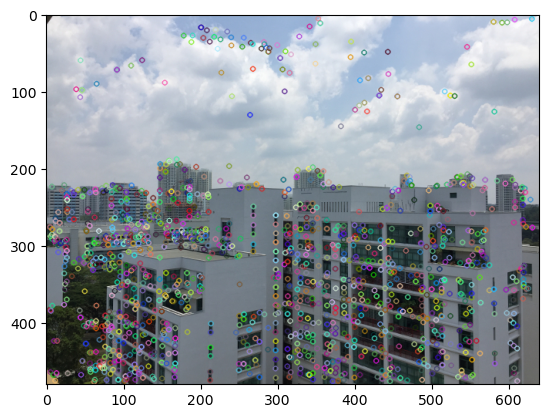

In [6]:
# Read input image
img_raw = cv2.imread('images/im01.jpg')
img_gray = cv2.cvtColor(img_raw, cv2.COLOR_BGR2GRAY)
img_raw = cv2.cvtColor(img_raw, cv2.COLOR_BGR2RGB)

# Extract SIFT features
sift = cv2.xfeatures2d.SIFT_create()
keypoints, descriptors = sift.detectAndCompute(img_gray, None)
img_sift = cv2.drawKeypoints(img_raw, keypoints, img_gray)

# Plot the result image
plt.imshow(img_sift)

## Part 3: Homography

In [6]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

img_1 = cv2.imread('images/h1.jpg', 1)
img_2 = cv2.imread('images/h2.jpg', 1)

def click_event(event, x, y, flags, points) -> None:
    """
    Record up to 4 points whenever the mouse clicks
    """
    if event == cv2.EVENT_LBUTTONDOWN:
        if len(points) < 4:
            # Display the point with the coordinates in the GUI
            font = cv2.FONT_HERSHEY_SIMPLEX
            cv2.circle(img, (x,y), 2, (0, 0, 255), 2)
            cv2.putText(img, str(x) + ',' + str(y), (x,y), font, 1, (0, 0, 255), 2)
            cv2.imshow('image', img)
            # Record the coordinates of the clicked point
            points.append([x, y])


In [9]:
points_1 = []

# Display image 1 in the GUI
img = cv2.imread('images/h1.jpg', 1)
cv2.imshow('image', img)
cv2.setMouseCallback('image', click_event, points_1)
cv2.waitKey(0)
cv2.destroyAllWindows()

points_1 = np.asarray(points_1, dtype=np.float32)
print(points_1)

[[241. 241.]
 [964. 241.]
 [965. 964.]
 [241. 965.]]


In [10]:
points_2 = []

# Display image 2 in the GUI
img = cv2.imread('images/h2.jpg', 1)
cv2.imshow('image', img)
cv2.setMouseCallback('image', click_event, points_2)
cv2.waitKey(0)
cv2.destroyAllWindows()

points_2 = np.asarray(points_2, dtype=np.float32)
print(points_2)

[[460.  60.]
 [744. 280.]
 [383. 473.]
 [111. 216.]]


In [14]:
def matrixH(A: np.array, B: np.array) -> np.array:
    """
    Compute the H matrix based on the corresponding points in image 1 and 2.
    
    Parameters
    ----------
        `A` (`np.array`): points selected in image 1
        `B` (`np.array`): points selected in image 2
    
    Returns
    -------
        `np.array`: vector
    """
    n = len(A)
    H = np.zeros((2*n,9));

    #initialise the matrix H
    for x in range(n):
        i = 2*x
        H[i,0] = A[x,0]
        H[i,1] = A[x,1]
        H[i,2] = 1
        H[i,6] = -A[x,0]*B[x,0]
        H[i,7] = -A[x,1]*B[x,0]
        H[i,8] = -B[x,0]
        i = 2*x + 1
        H[i,3] = A[x,0]
        H[i,4] = A[x,1]
        H[i,5] = 1
        H[i,6] = -A[x,0]*B[x,1]
        H[i,7] = -A[x,1]*B[x,1]
        H[i,8] = -B[x,1]
            
    # u,s,vh = np.linalg.svd(a=H, full_matrices=False, compute_uv=True, hermitian=False)
    print(H)
    # print(vh)
    u,s,vh = np.linalg.svd(a=H, full_matrices=True, compute_uv=True, hermitian=False)
    v = vh[:,-1]
    v = v / np.linalg.norm(v)
    v = v / v[-1]
    v = np.reshape(v, newshape=(3, 3))
    # v = v.transpose()
    return v
    
# Calculate the Homography matrix from image 1 to image 2
H_1 = matrixH(points_2, points_1)
print(H_1)

# Calculate the Homography matrix from image 2 to image 1
H_2 = matrixH(points_1, points_2)
print(H_2)

[[ 4.60000e+02  6.00000e+01  1.00000e+00  0.00000e+00  0.00000e+00
   0.00000e+00 -1.10860e+05 -1.44600e+04 -2.41000e+02]
 [ 0.00000e+00  0.00000e+00  0.00000e+00  4.60000e+02  6.00000e+01
   1.00000e+00 -1.10860e+05 -1.44600e+04 -2.41000e+02]
 [ 7.44000e+02  2.80000e+02  1.00000e+00  0.00000e+00  0.00000e+00
   0.00000e+00 -7.17216e+05 -2.69920e+05 -9.64000e+02]
 [ 0.00000e+00  0.00000e+00  0.00000e+00  7.44000e+02  2.80000e+02
   1.00000e+00 -1.79304e+05 -6.74800e+04 -2.41000e+02]
 [ 3.83000e+02  4.73000e+02  1.00000e+00  0.00000e+00  0.00000e+00
   0.00000e+00 -3.69595e+05 -4.56445e+05 -9.65000e+02]
 [ 0.00000e+00  0.00000e+00  0.00000e+00  3.83000e+02  4.73000e+02
   1.00000e+00 -3.69212e+05 -4.55972e+05 -9.64000e+02]
 [ 1.11000e+02  2.16000e+02  1.00000e+00  0.00000e+00  0.00000e+00
   0.00000e+00 -2.67510e+04 -5.20560e+04 -2.41000e+02]
 [ 0.00000e+00  0.00000e+00  0.00000e+00  1.11000e+02  2.16000e+02
   1.00000e+00 -1.07115e+05 -2.08440e+05 -9.65000e+02]]
[[ 1.44929176e+00 -1.00

[[ 2.82703947e-01 -4.67569017e-01  4.80381590e+02]
 [ 2.54629688e-01  1.83026314e-01 -4.86278215e+01]
 [-1.20246709e-04 -9.77840670e-05  1.00000000e+00]]


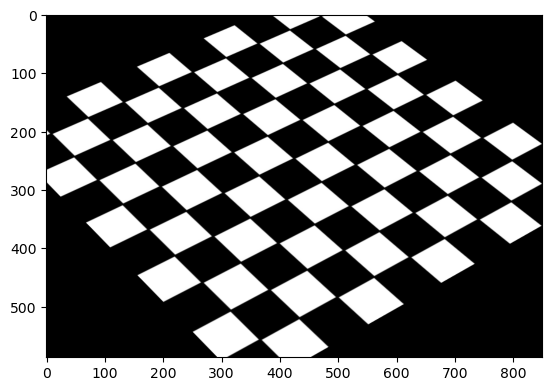

In [12]:
# Perspective transform from image 1 to 2
M = cv2.getPerspectiveTransform(np.asarray(points_1, dtype=np.float32), np.asarray(points_2, dtype=np.float32))
print(M)
img_1_wraped = cv2.warpPerspective(img_1, M, (img_2.shape[1], img_2.shape[0]), flags=cv2.INTER_LINEAR)
plt.imshow(img_1_wraped)

[[241, 241], [964, 241], [964, 964], [242, 964]]
[[459, 60], [742, 281], [383, 473], [111, 216]]
[[ 1.02843572e+00  2.43053867e+00 -3.73056938e+02]
 [-1.45796115e+00  1.97299348e+00  7.95651936e+02]
 [-2.75054367e-05  4.75103890e-04  1.00000000e+00]]


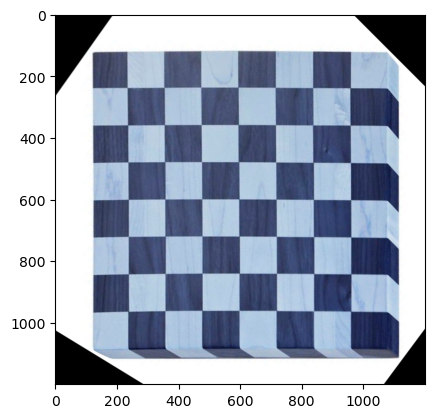

In [34]:

# img_1_wraped = cv2.warpPerspective(img_1, H_1, (img_2.shape[1], img_2.shape[0]), flags=cv2.INTER_LINEAR)
# plt.imshow(img_1_wraped)

# Perspective transform from image 2 to 1
M = cv2.getPerspectiveTransform(np.asarray(points_2, dtype=np.float32), np.asarray(points_1, dtype=np.float32))
print(M)
img_2_wraped = cv2.warpPerspective(img_2, M, (img_1.shape[1], img_1.shape[0]), flags=cv2.INTER_LINEAR)
plt.imshow(img_2_wraped)

## Part 4: Manual Homography + Sticthing